<a href="https://colab.research.google.com/github/l3wandowskyy/ML_Project/blob/Projekt-main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetics_data.csv", sep=";", encoding='utf-8')

# Sprawdzenie liczby kolumn i wierszy
df.shape

# Sprawdzenie pierwszych wierszy
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.cze,0.351,31,No
2,8,183,64,0,0,23.mar,0.672,32,Yes
3,1,89,66,23,94,28.sty,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [3]:
# Usunięcie duplikatów
df = df.drop_duplicates()

df.shape

(768, 9)

In [4]:
# Sprawdzenie wartości wartości null
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,81.000000


In [6]:
df.info()

# Próba zamiany BMI i DiabetesPedigreeFunction na typ danych liczbowe, ale jest błąd

#df['BMI'] = df['BMI'].astype(float)
#df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Pregnancies               768 non-null    int64 
 1   Glucose                   768 non-null    int64 
 2   BloodPressure             768 non-null    int64 
 3   SkinThickness             768 non-null    int64 
 4   Insulin                   768 non-null    int64 
 5   BMI                       768 non-null    object
 6   DiabetesPedigreeFunction  768 non-null    object
 7   Age                       768 non-null    int64 
 8   Outcome                   768 non-null    object
dtypes: int64(6), object(3)
memory usage: 54.1+ KB


In [7]:
# Zamiana miesięcy na odpowiednie liczby
month_mapping = {
    'sty': '01',
    'lut': '02',
    'mar': '03',
    'kwi': '04',
    'maj': '05',
    'cze': '06',
    'lip': '07',
    'sie': '08',
    'wrz': '09',
    'paź': '10',
    'lis': '11',
    'gru': '12'
}

df['BMI'] = df['BMI'].replace(month_mapping, regex=True)
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace(month_mapping, regex=True)

# Zamiana 'bmi' i 'DiabetesPedigreeFunction' na float, ignorując wartości, które nie mogą być przekonwertowane
df['BMI'] = pd.to_numeric(df['BMI'], errors='coerce')
df['DiabetesPedigreeFunction'] = pd.to_numeric(df['BMI'], errors='coerce')

In [8]:
# Zamiana 0 na wartości średnie
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.269891,31.814219,33.240885
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.029703,8.008770,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.020000,0.000000,21.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.050000,27.030000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,32.000000,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,36.600000,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,67.100000,81.000000


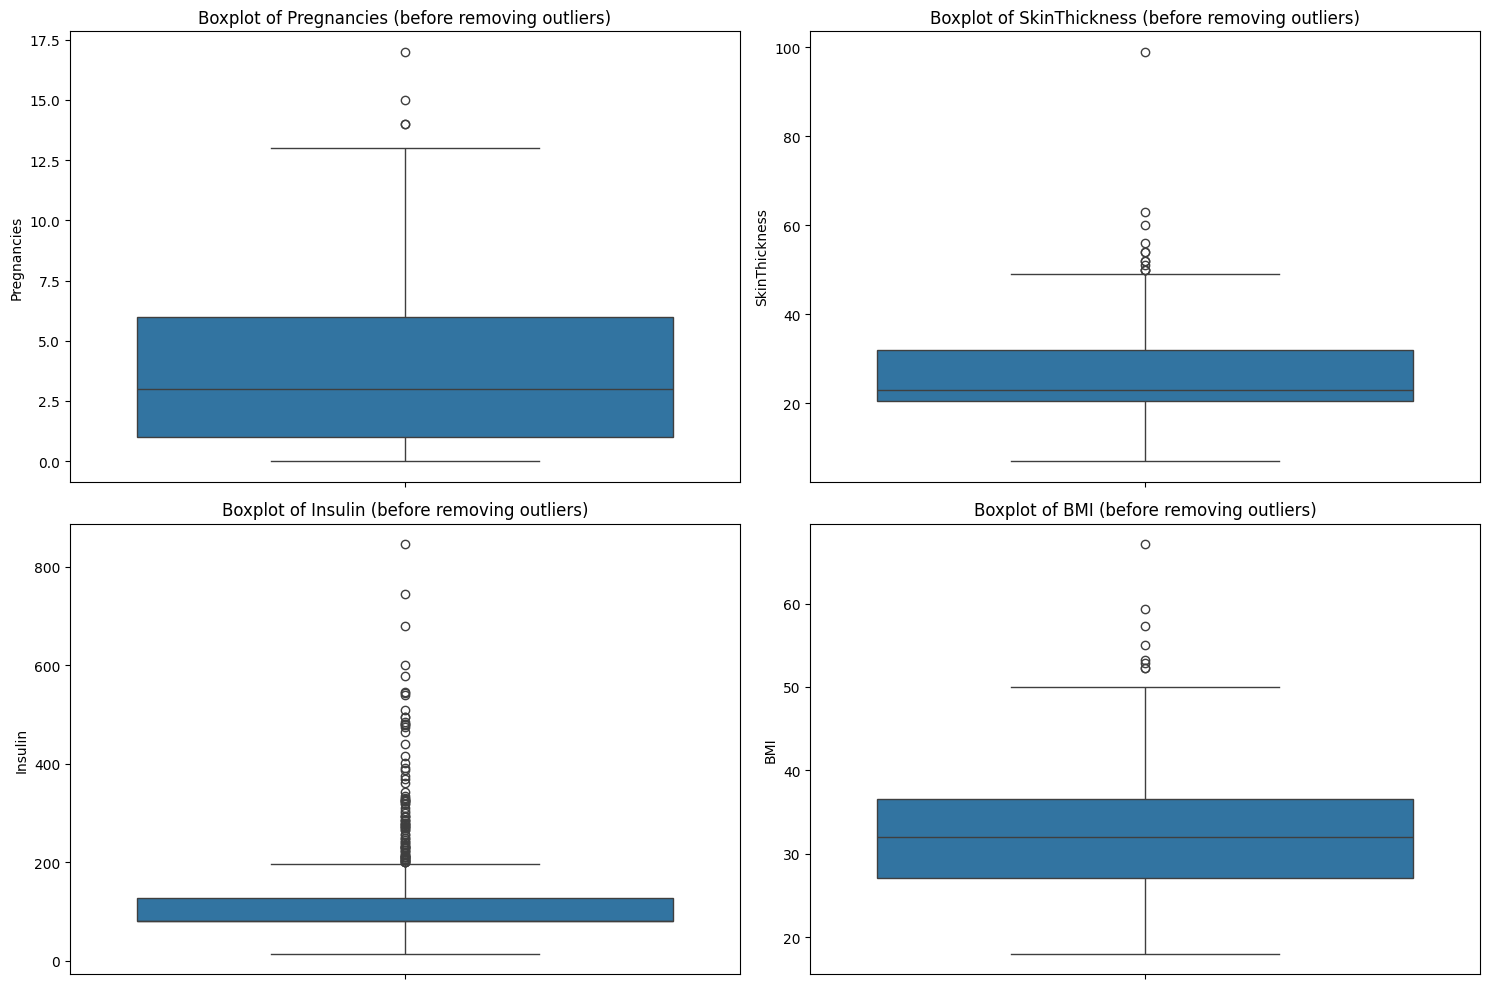

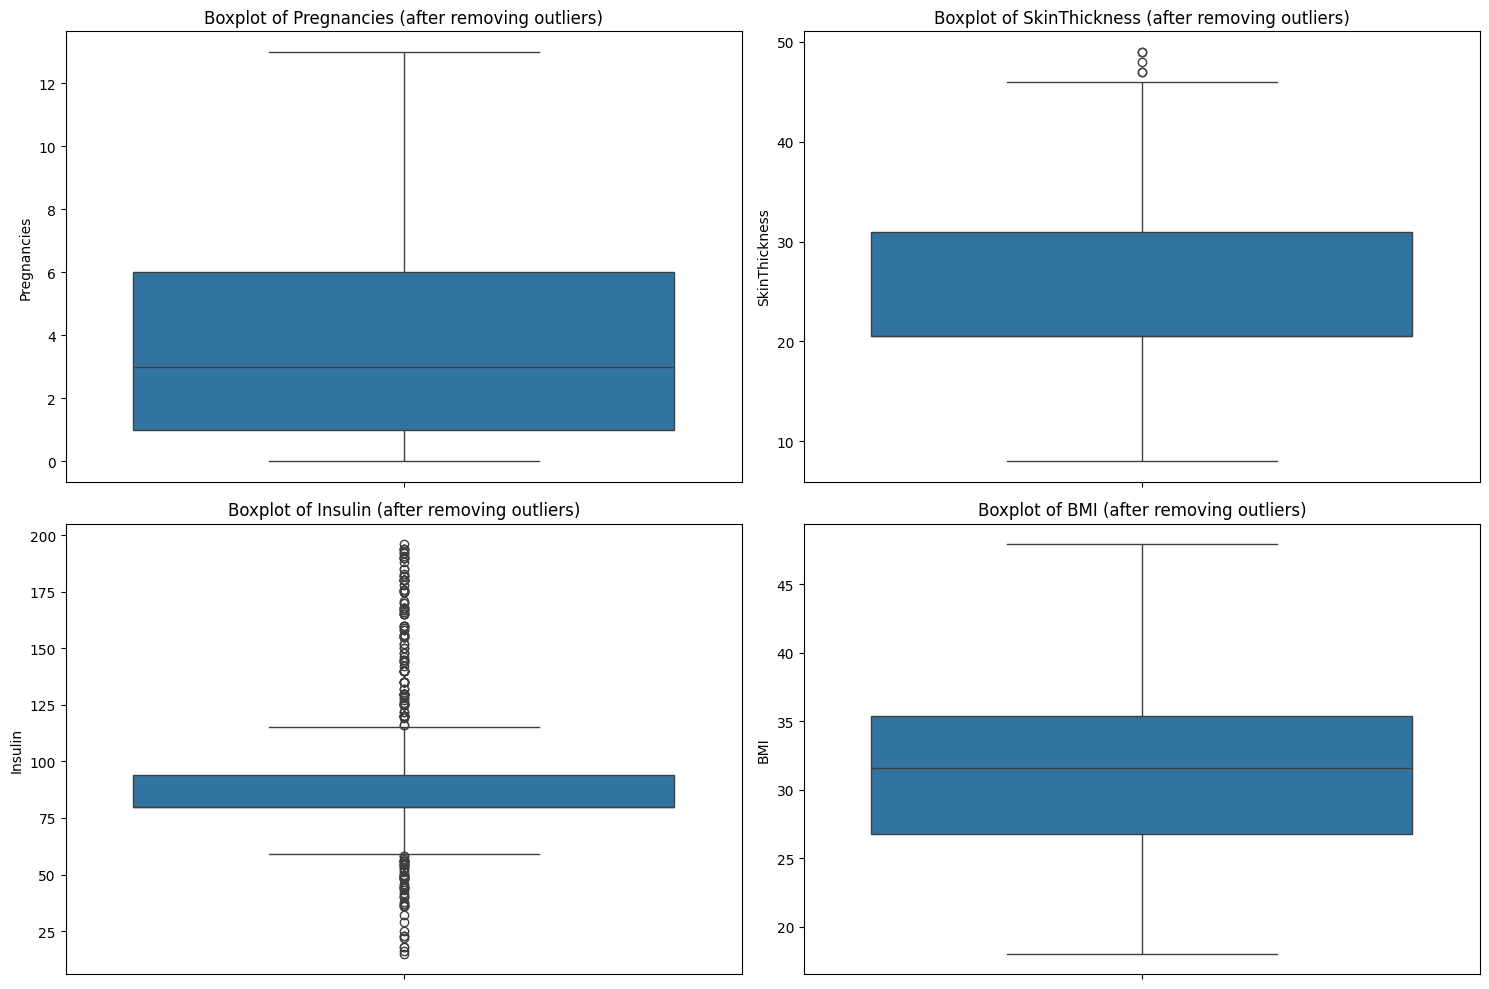

In [10]:
# Lista krotek zawierających nazwy kolumn oraz kwantyle Q1 i Q3
columns_iqr = [
    ('Pregnancies', 0.25, 0.75),
    ('SkinThickness', 0.25, 0.75),
    ('Insulin', 0.25, 0.75),
    ('BMI', 0.25, 0.75)
]

# Tworzenie wykresów boxplot przed usunięciem wartości odstających
plt.figure(figsize=(15, 10))
for i, (column, q1, q3) in enumerate(columns_iqr, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (before removing outliers)')
plt.tight_layout()
plt.show()

# Iterujemy przez każdą kolumnę i stosujemy metodę IQR do usuwania wartości odstających
for column, q1, q3 in columns_iqr:
    q1_val = df[column].quantile(q1)
    q3_val = df[column].quantile(q3)
    iqr = q3_val - q1_val

    # Usuwamy wartości odstające z tej kolumny
    df = df.drop(df.loc[df[column] > (q3_val + 1.5 * iqr)].index)
    df = df.drop(df.loc[df[column] < (q1_val - 1.5 * iqr)].index)

# Tworzenie wykresów boxplot po usunięciu wartości odstających
plt.figure(figsize=(15, 10))
for i, (column, q1, q3) in enumerate(columns_iqr, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column} (after removing outliers)')
plt.tight_layout()
plt.show()

df.describe()

In [11]:
# Utworzenie obiektu encodera
le = LabelEncoder()

# Zamiana wartości Outcome na liczbowe, dzięki labelencodera
df.Outcome = le.fit_transform(df.Outcome)

# Sprawdzenie czy wszystko się zakodowało poprawnie

print(dict(zip(le.classes_, le.transform(le.classes_))))

{'No': 0, 'Yes': 1}


Najlepsza wartość k: 21
Mean Cross-Validation Score k-NN: 0.774 (0.039)
Cross-Validation Scores k-NN: [0.72826087 0.75       0.81521739 0.75       0.82417582]
Precision (Precyzja): 0.6904761904761905
Recall (Czułość): 0.4393939393939394
F1-score: 0.537037037037037


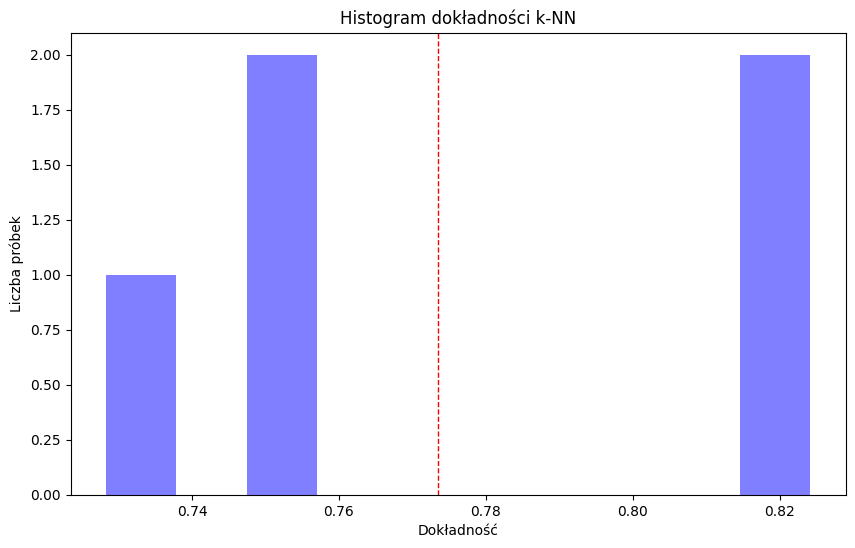

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Podział danych na cechy (features) i etykiety (labels)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Podział danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Skalowanie danych (opcjonalne, ale może poprawić wydajność k-NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Znalezienie optymalnej wartości parametru k dla k-NN
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 31)}  # Testujemy wartości k od 1 do 30
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_knn_model = grid_search.best_estimator_
best_k = grid_search.best_params_['n_neighbors']
print("Najlepsza wartość k:", best_k)

# Modelowanie k-NN z optymalnym parametrem k
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Walidacja krzyżowa dla k-NN
knn_cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print('Mean Cross-Validation Score k-NN: %.3f (%.3f)' % (np.mean(knn_cv_scores), np.std(knn_cv_scores)))
print("Cross-Validation Scores k-NN:", knn_cv_scores)

# Prognozy na zbiorze testowym
y_pred = knn_model.predict(X_test_scaled)

# Obliczanie różnych miar skuteczności
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Precision (Precyzja):", precision)
print("Recall (Czułość):", recall)
print("F1-score:", f1)


# Wykres histogramu dokładności k-NN
plt.figure(figsize=(10, 6))
plt.hist(knn_cv_scores, bins=10, alpha=0.5, color='blue')
plt.axvline(np.mean(knn_cv_scores), color='red', linestyle='dashed', linewidth=1)
plt.xlabel('Dokładność')
plt.ylabel('Liczba próbek')
plt.title('Histogram dokładności k-NN')
plt.show()

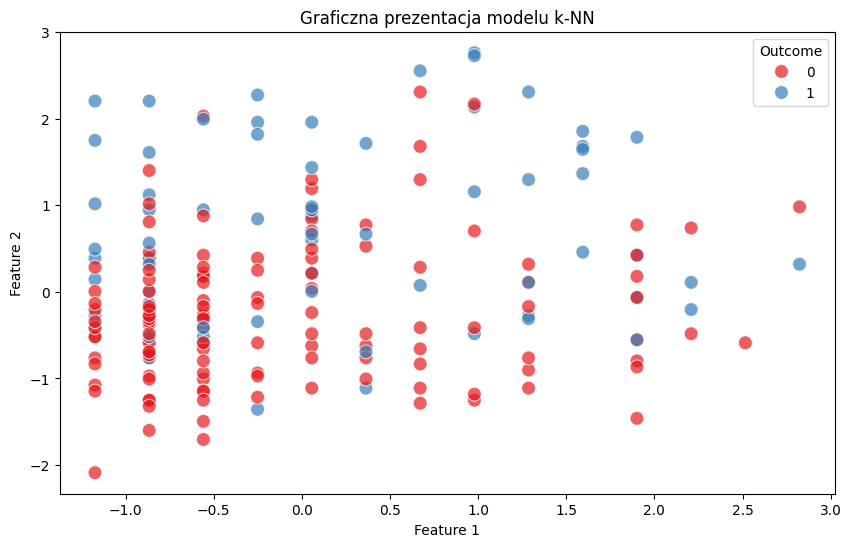

In [13]:
# Graficzna prezentacja modelu k-NN
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_scaled[:, 0], y=X_test_scaled[:, 1], hue=y_test, palette='Set1', s=100, alpha=0.7)
plt.title('Graficzna prezentacja modelu k-NN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Outcome', loc='upper right')
plt.show()

Najlepsze parametry drzewa decyzyjnego: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 12}
Mean Cross-Validation Score Decision Tree: 0.793 (0.031)
Cross-Validation Scores Decision Tree: [0.73913043 0.80434783 0.81521739 0.82608696 0.78021978]
Precision (Precyzja): 0.6557377049180327
Recall (Czułość): 0.6060606060606061
F1-score: 0.6299212598425197


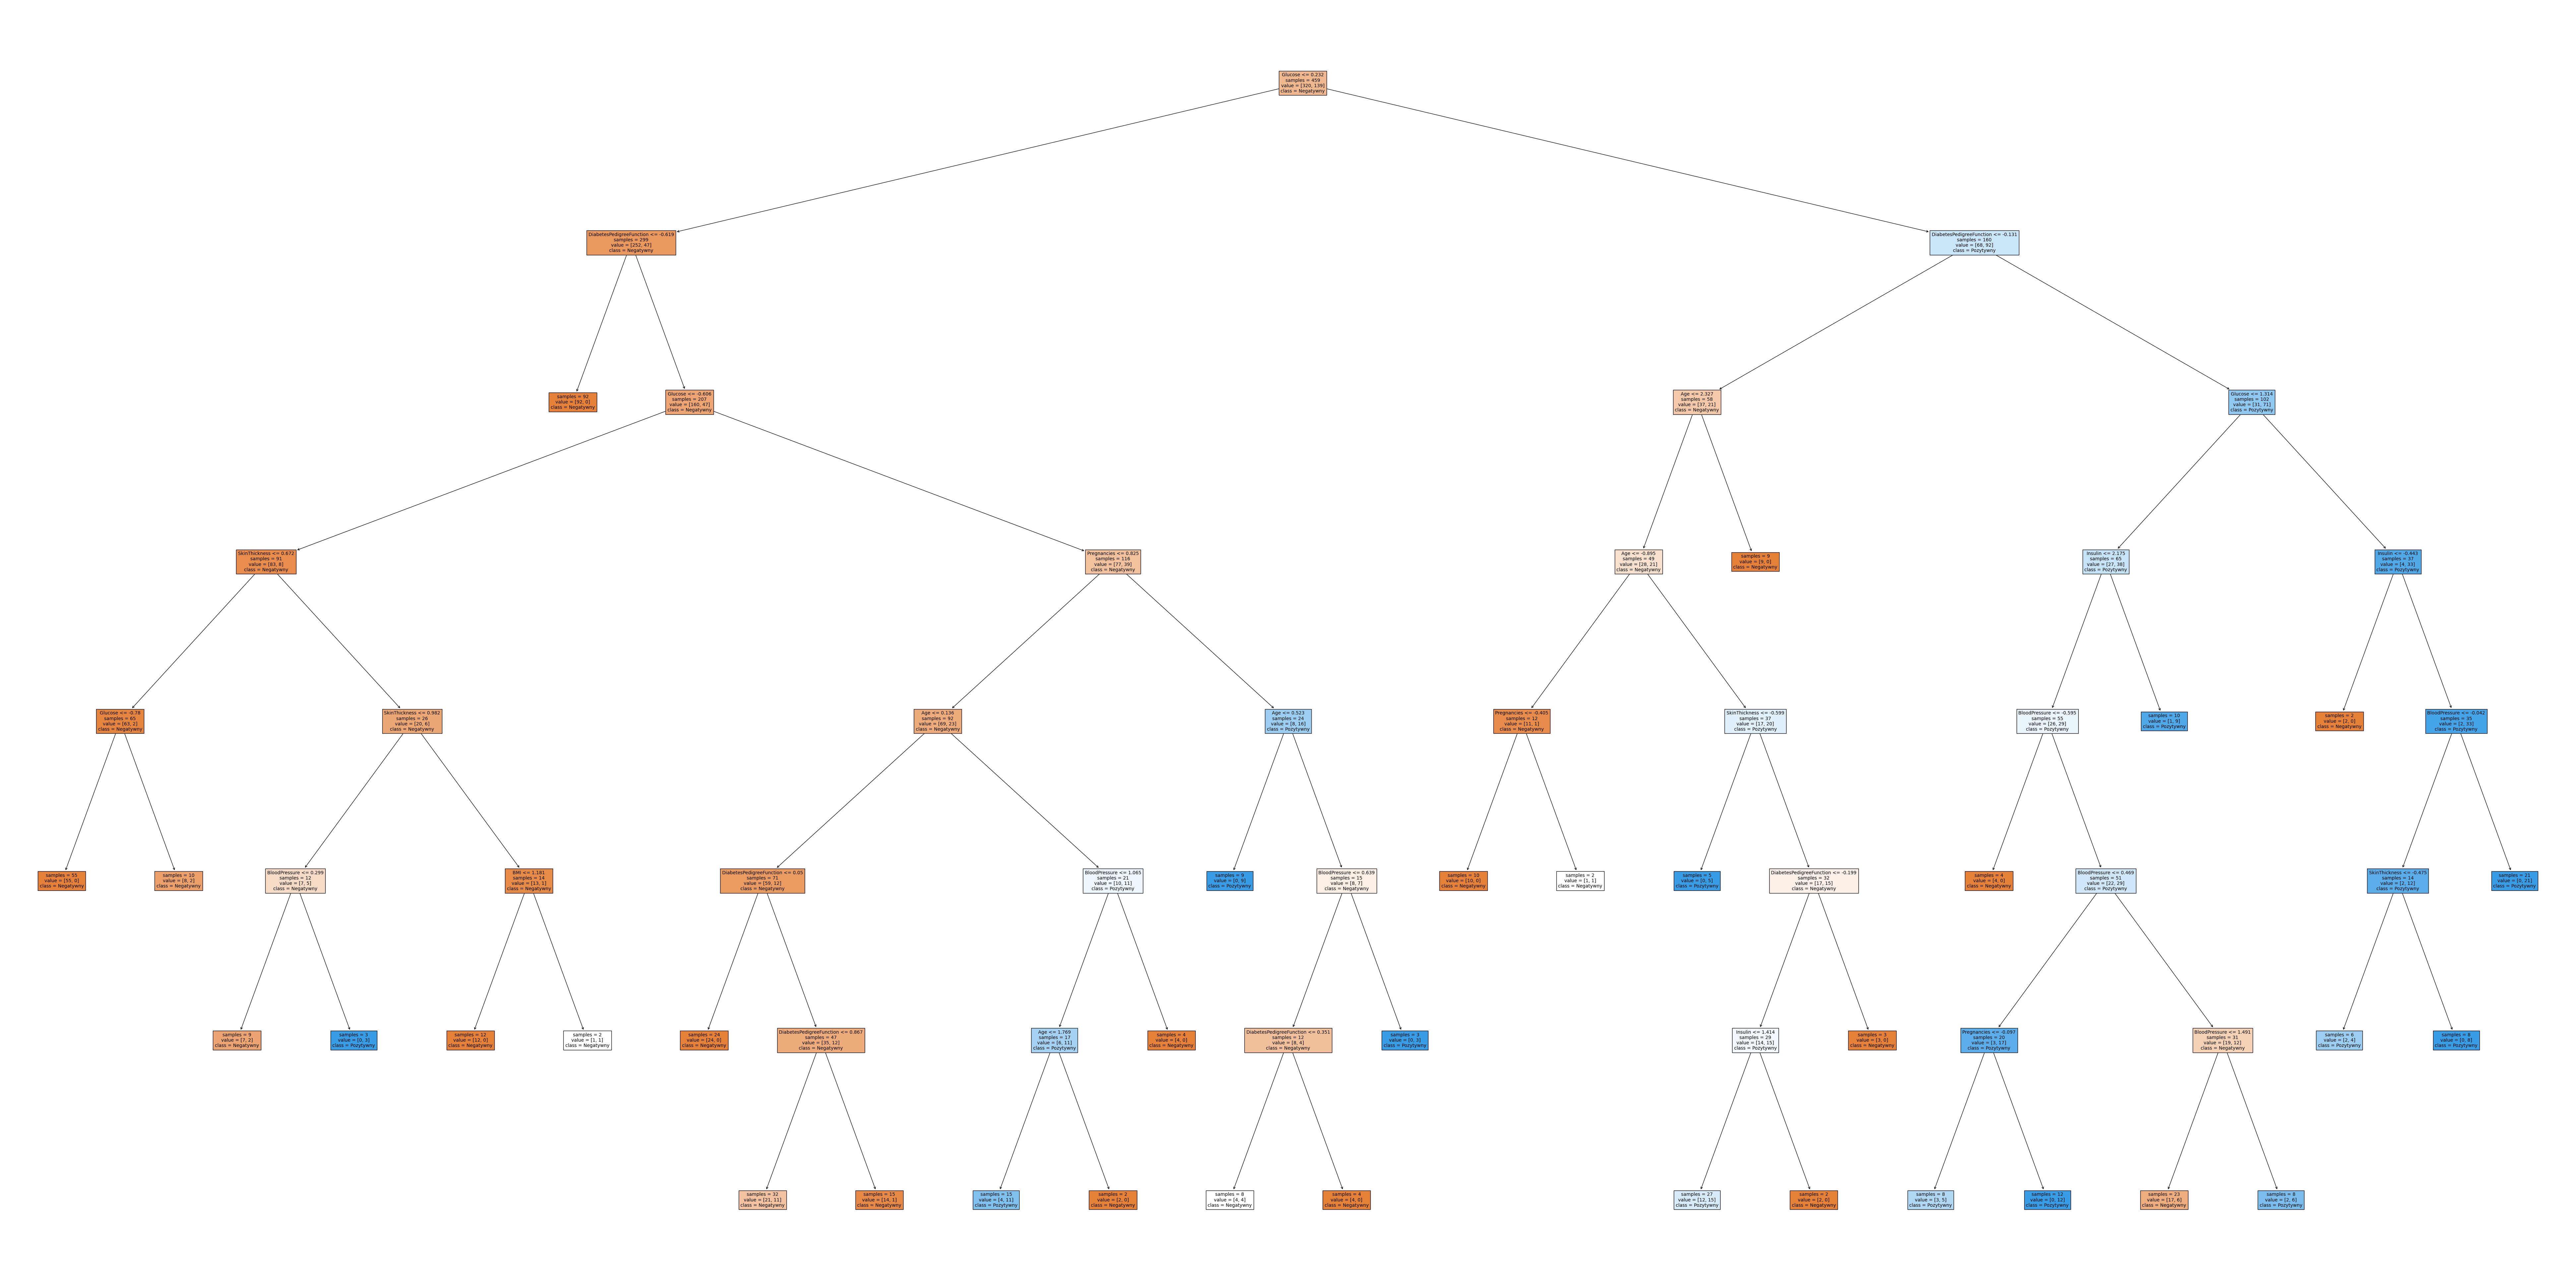

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

# Znalezienie optymalnej wartości parametrów dla drzewa decyzyjnego
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': range(1, 21),
    'min_samples_split': range(2, 21),
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_dt_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Najlepsze parametry drzewa decyzyjnego:", best_params)

# Modelowanie drzewa decyzyjnego z optymalnymi parametrami
dt_model = DecisionTreeClassifier(**best_params, random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Walidacja krzyżowa dla drzewa decyzyjnego
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
print('Mean Cross-Validation Score Decision Tree: %.3f (%.3f)' % (dt_cv_scores.mean(), dt_cv_scores.std()))
print("Cross-Validation Scores Decision Tree:", dt_cv_scores)

# Prognozy na zbiorze testowym
y_pred = dt_model.predict(X_test_scaled)

# Obliczanie różnych miar skuteczności
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision (Precyzja):", precision)
print("Recall (Czułość):", recall)
print("F1-score:", f1)

# Wizualizacja drzewa decyzyjnego
plt.figure(figsize=(100, 50))  # Zmniejszenie rozmiaru wykresu
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Negatywny', 'Pozytywny'],
          filled=True, impurity=False,
          fontsize=10)  # Zmniejszenie czcionki dla lepszej czytelności
plt.show()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Najlepsze parametry lasu losowego: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Mean Cross-Validation Score las losowy: 0.7691113234591496
Cross-Validation Scores las losowy: [0.67391304 0.81521739 0.81521739 0.75       0.79120879]
Precision (Precyzja): 0.6774193548387096
Recall (Czułość): 0.6363636363636364
F1-score: 0.65625


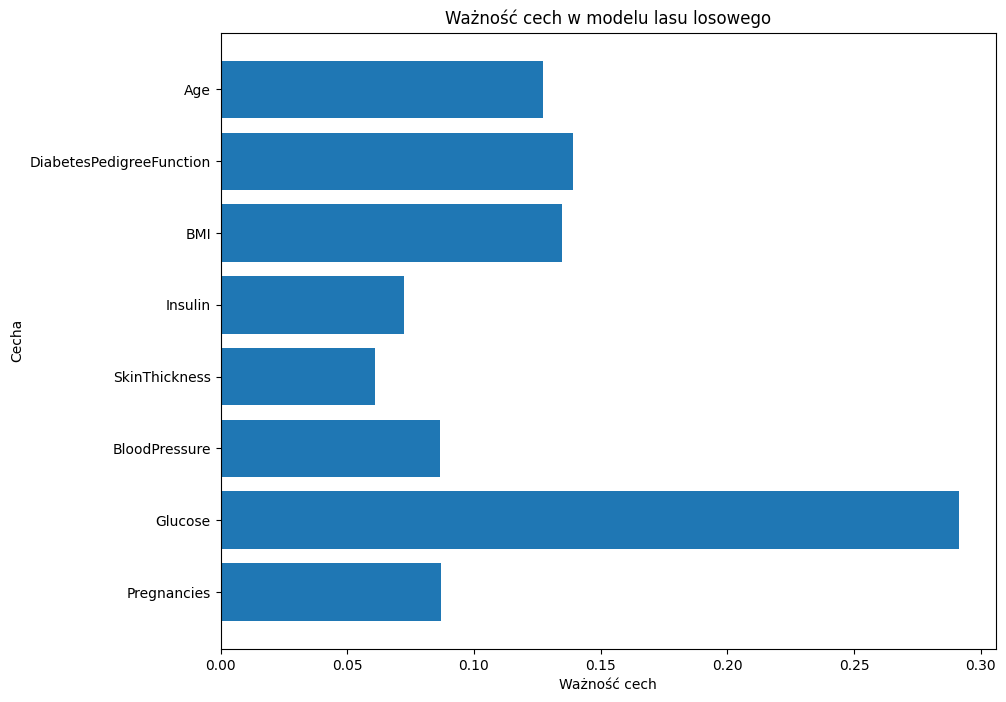

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Zdefiniowanie przestrzeni parametrów do losowego przeszukiwania
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Ustawienie ilości iteracji (wybór kombinacji parametrów) w procesie losowego przeszukiwania
n_iter = 10  # Możesz dostosować tę wartość w zależności od zasobów i czasu obliczeniowego

# Losowe przeszukiwanie
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=param_grid,
                                      n_iter=n_iter,
                                      cv=5,
                                      n_jobs=-1,
                                      verbose=2)

# Dopasowanie modelu na danych treningowych
random_search_rf.fit(X_train_scaled, y_train)

# Najlepszy model
best_rf_model = random_search_rf.best_estimator_
best_rf_params = random_search_rf.best_params_
print("Najlepsze parametry lasu losowego:", best_rf_params)

# Dopasowanie najlepszego modelu na danych treningowych
best_rf_model.fit(X_train_scaled, y_train)

# Walidacja krzyżowa dla najlepszego modelu
rf_cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5)
print("Mean Cross-Validation Score las losowy:", np.mean(rf_cv_scores))
print("Cross-Validation Scores las losowy:", rf_cv_scores)

# Prognozy na zbiorze testowym
rf_predictions = best_rf_model.predict(X_test_scaled)

# Obliczanie różnych miar skuteczności
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

print("Precision (Precyzja):", rf_precision)
print("Recall (Czułość):", rf_recall)
print("F1-score:", rf_f1)

# Wykres ważności cech
feature_importances = best_rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_names)), feature_names)
plt.xlabel('Ważność cech')
plt.ylabel('Cecha')
plt.title('Ważność cech w modelu lasu losowego')
plt.show()


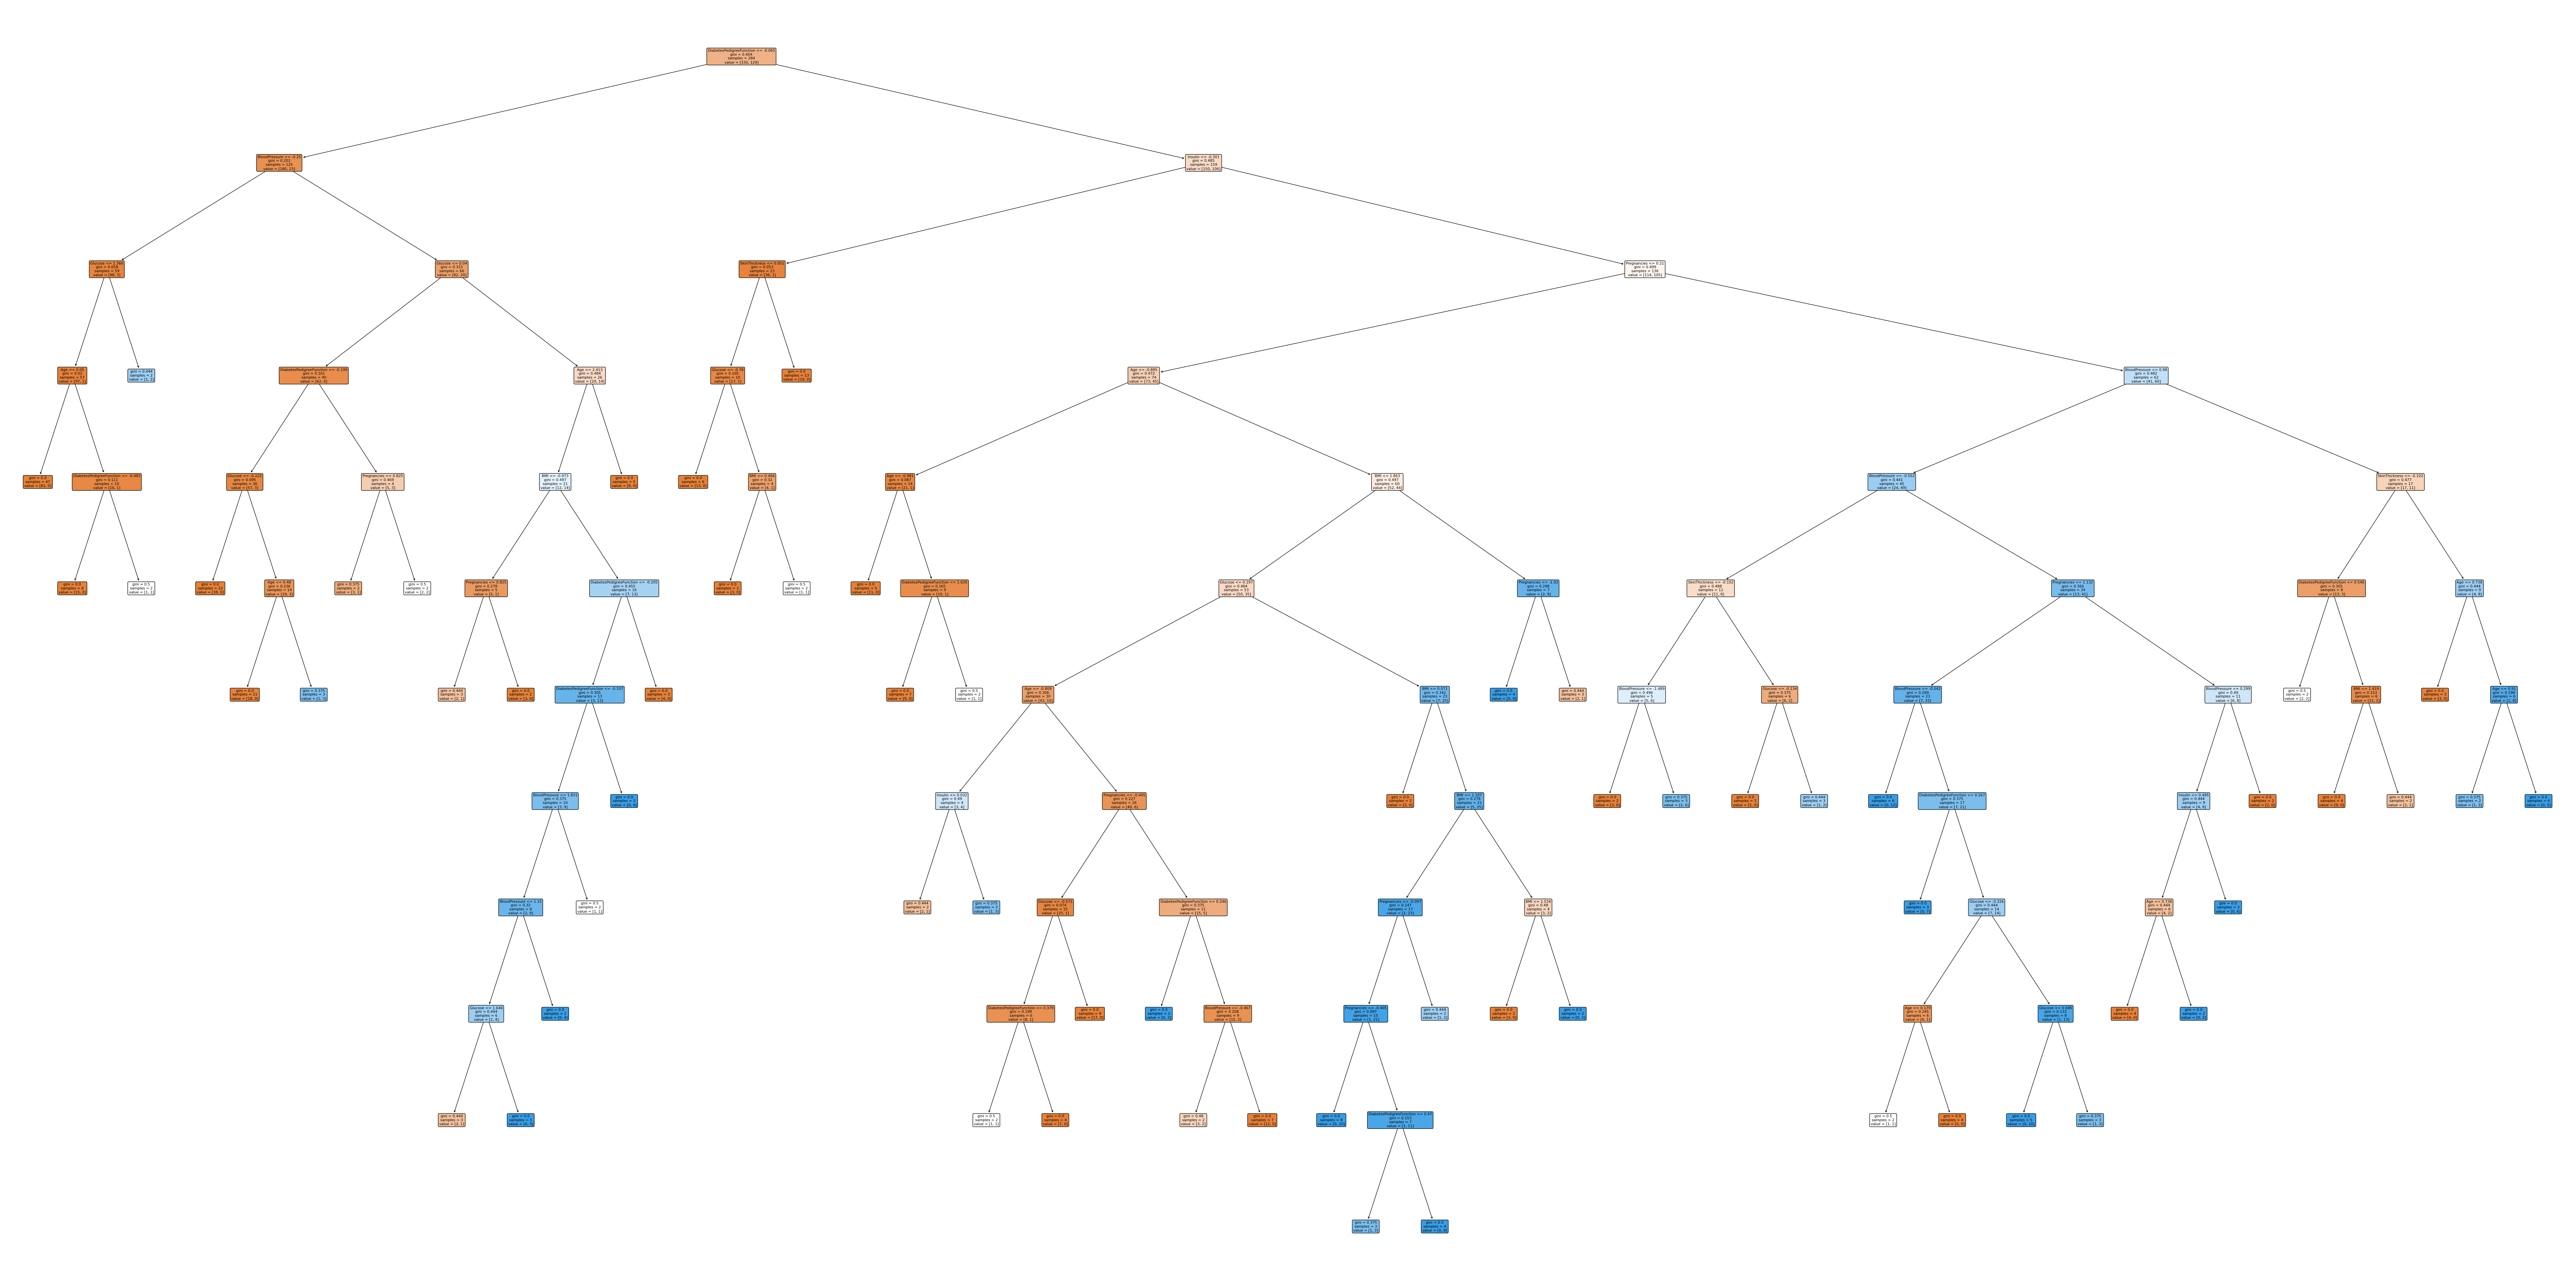

In [16]:
from sklearn.tree import plot_tree

# Wyświetlanie jednego drzewa z modelu lasu losowego
plt.figure(figsize=(100, 50))
plot_tree(best_rf_model.estimators_[0], feature_names=feature_names, filled=True, rounded=True)
plt.show()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Trenowanie modelu regresji logistycznej
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Prognozy na zbiorze testowym
lr_predictions = lr_model.predict(X_test_scaled)

# Obliczanie różnych miar skuteczności
lr_accuracy = accuracy_score(y_test, lr_predictions)
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

# Wyświetlenie wyników
print("Accuracy regresja logistyczna:", lr_accuracy)
print("Precision regresja logistyczna:", lr_precision)
print("Recall regresja logistyczna:", lr_recall)
print("F1-score regresja logistyczna:", lr_f1)

# Walidacja krzyżowa dla regresji logistycznej
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores regresja logistyczna:", lr_cv_scores)
print("Mean Cross-Validation Score regresja logistyczna:", np.mean(lr_cv_scores))

# Znalezienie optymalnej wartości parametrów dla regresji logistycznej
param_grid_lr = {
'C': np.logspace(-3, 3, 7),
'penalty': ['l1', 'l2'],
'solver': ['liblinear'] # Dla regularyzacji L1 i L2 'liblinear' jest dobrym wyborem
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_scaled, y_train)

# Najlepszy estimator i parametry
best_lr_model = grid_search_lr.best_estimator_
best_lr_params = grid_search_lr.best_params_

print("Najlepsze parametry dla regresji logistycznej:", best_lr_params)

# Modelowanie regresji logistycznej z optymalnymi parametrami
best_lr_model.fit(X_train_scaled, y_train)

# Walidacja krzyżowa dla optymalnego modelu regresji logistycznej
print('Mean Cross-Validation Score Logistic Regression: %.3f' % np.mean(lr_cv_scores))
lr_cv_scores = cross_val_score(best_lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Obliczanie różnych miar skuteczności dla optymalnego modelu
lr_predictions_optimized = best_lr_model.predict(X_test_scaled)
lr_precision_optimized = precision_score(y_test, lr_predictions_optimized)
lr_recall_optimized = recall_score(y_test, lr_predictions_optimized)
lr_f1_optimized = f1_score(y_test, lr_predictions_optimized)

print("Precision (Precyzja) dla optymalnego modelu:", lr_precision_optimized)
print("Recall (Czułość) dla optymalnego modelu:", lr_recall_optimized)
print("F1-score dla optymalnego modelu:", lr_f1_optimized)

Accuracy regresja logistyczna: 0.7614213197969543
Precision regresja logistyczna: 0.6792452830188679
Recall regresja logistyczna: 0.5454545454545454
F1-score regresja logistyczna: 0.6050420168067228
Cross-Validation Scores regresja logistyczna: [0.73913043 0.83695652 0.83695652 0.67391304 0.79120879]
Mean Cross-Validation Score regresja logistyczna: 0.7756330625895843
Najlepsze parametry dla regresji logistycznej: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Mean Cross-Validation Score Logistic Regression: 0.776
Precision (Precyzja) dla optymalnego modelu: 0.6851851851851852
Recall (Czułość) dla optymalnego modelu: 0.5606060606060606
F1-score dla optymalnego modelu: 0.6166666666666667


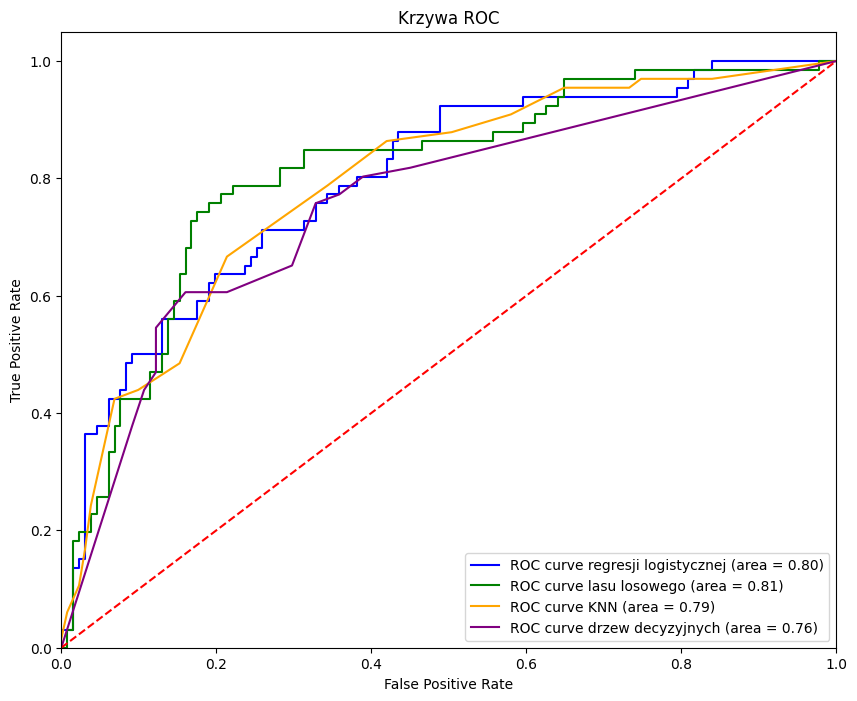

In [28]:
from sklearn.metrics import roc_curve, auc
# Obliczenie współczynników dla krzywej ROC dla obu modeli
fpr_lr, tpr_lr, _ = roc_curve(y_test, best_lr_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, best_rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Obliczenie współczynników dla krzywej ROC dla modeli KNN i drzew decyzyjnych
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Rysowanie krzywej ROC
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', label='ROC curve regresji logistycznej (area = %0.2f)' % roc_auc_lr)
plt.plot(fpr_rf, tpr_rf, color='green', label='ROC curve lasu losowego (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='orange', label='ROC curve KNN (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_dt, tpr_dt, color='purple', label='ROC curve drzew decyzyjnych (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()

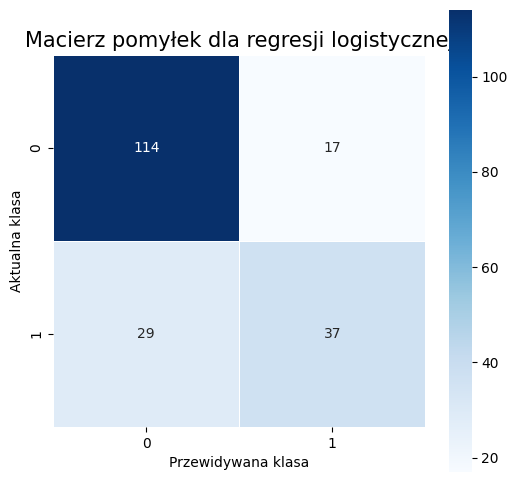

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Macierz pomyłek dla regresji logistycznej
cm_lr = confusion_matrix(y_test, lr_predictions_optimized)

# Rysowanie macierzy pomyłek
plt.figure(figsize=(6, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", linewidths=.5, square=True, cmap='Blues')
plt.ylabel('Aktualna klasa')
plt.xlabel('Przewidywana klasa')
plt.title('Macierz pomyłek dla regresji logistycznej', size=15)
plt.show()

In [20]:
# Wybór najlepszego modelu
models = {
    "k-NN": best_knn_model,
    "Decision Tree": best_dt_model,
    "Random Forest": best_rf_model,
    "Logistic Regression": best_lr_model
}

best_model_name = ""
best_f1_score = 0

# Iteracja po modelach
for name, model in models.items():
    # Dopasowanie modelu
    model.fit(X_train_scaled, y_train)

    # Prognozy na zbiorze testowym
    y_pred = model.predict(X_test_scaled)

    # Obliczanie F1-score
    f1 = f1_score(y_test, y_pred)

    # Wybór najlepszego modelu
    if f1 > best_f1_score:
        best_f1_score = f1
        best_model_name = name

# Wyświetlenie najlepszego modelu
print("Najlepszy model:", best_model_name)
print("F1-score dla najlepszego modelu:", best_f1_score)

Najlepszy model: Random Forest
F1-score dla najlepszego modelu: 0.65625
